In [30]:
import pandas as pd

# Đọc file dataset 1
data_booking = pd.read_csv('dataset/booking_hotel.csv', encoding='ISO-8859-1')
# Hiển thị dữ liệu
print("Dữ liệu huấn luyện (booking_hotel.csv):")
print(data_booking.head())  # Hiển thị 5 dòng đầu tiên

Dữ liệu huấn luyện (booking_hotel.csv):
                          Hotel Name                       Location Rating  \
0   Krabi La Playa Resort - SHA Plus                  Ao Nang Beach    8.2   
1        KC Beach Club & Pool Villas  Chaweng City Center , Chaweng    7.1   
2       Rawai VIP Villas & Kids Park                    Rawai Beach    8.3   
3    FuramaXclusive Sathorn, Bangkok              Bang Rak, Bangkok    7.7   
4  Bo Phut Resort and Spa - SHA Plus                         Bophut    9.3   

  Review Score Number of     Room    Score  \
0    Very Good          141            8.6   
1         Good          193            NaN   
2    Very Good           63            8.9   
3         Good        1,304            8.1   
4    Wonderful          294            9.6   

                               Room Type                Bed Type  \
0             Deluxe Double or Twin Room     1 double or 2 twins   
1  Double Room with Balcony and Sea View             1 queen bed   
2         

In [3]:
#Thông tin về dataset 1
data_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Hotel Name                                 3465 non-null   object 
 1   Location                                   3465 non-null   object 
 2   Rating                                     3365 non-null   object 
 3   Review Score                               3359 non-null   object 
 4   Number of                                  3359 non-null   object 
 5   Room    Score                              2709 non-null   float64
 6   Room Type                                  3465 non-null   object 
 7   Bed Type                                   3449 non-null   object 
 8   Room Price (in BDT or any other currency)  3465 non-null   object 
dtypes: float64(1), object(8)
memory usage: 243.8+ KB


In [4]:
print(data_booking.describe())

       Room    Score
count    2709.000000
mean        8.779734
std         0.472312
min         8.000000
25%         8.400000
50%         8.800000
75%         9.100000
max        10.000000


In [31]:
#  loại bỏ khoảng trắng không mong muốn
data_booking.columns = data_booking.columns.str.strip().str.replace(' +', ' ', regex=True)

# Xử lý cột "Room Price" để chuyển sang dạng số Loại bỏ ký tự không phải số như tiền tệ và khoảng trắng
data_booking['Room Price'] = data_booking['Room Price (in BDT or any other currency)'] \
    .str.replace(r'[^\d.]', '', regex=True).astype(float)
# Bước 3: Xử lý giá trị thiếu
# Thay thế giá trị thiếu trong cột số bằng trung vị (median)
num_columns = ['Rating', 'Room Score', 'Room Price']
for col in num_columns:
    data_booking[col] = pd.to_numeric(data_booking[col], errors='coerce')  # Chuyển sang dạng số
    data_booking[col].fillna(data_booking[col].median(), inplace=True)

# Thay thế giá trị thiếu trong cột văn bản bằng "Unknown"
text_columns = ['Hotel Name', 'Location', 'Review Score', 'Room Type', 'Bed Type']
for col in text_columns:
    data_booking[col].fillna('Unknown', inplace=True)


C:\Users\huyho\AppData\Local\Temp\ipykernel_1788\4127259561.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_booking[col].fillna(data_booking[col].median(), inplace=True)
C:\Users\huyho\AppData\Local\Temp\ipykernel_1788\4127259561.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [37]:
# Bước 4: Xác định nhãn mục tiêu và đặc trưng
# Ví dụ: Dùng "Rating" làm nhãn mục tiêu
target = 'Rating'
features = ['Room Price', 'Room Score', 'Location', 'Review Score']
# Mã hóa cột văn bản thành dạng số (sử dụng Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Location', 'Review Score']:
    data_booking[col] = le.fit_transform(data_booking[col])

# Tạo dataframe đã làm sạch
data_cleaned = data_booking[features + [target]]

# Kiểm tra kết quả
print(data_cleaned.head())
print(data_cleaned.info())

   Room Price  Room Score  Location  Review Score  Rating
0    146026.0         8.6        54             5     8.2
1    215304.0         8.8       294             2     7.1
2    435384.0         8.9       807             5     8.3
3    146240.0         8.1       169             2     7.7
4    621072.0         9.6       204             6     9.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Room Price    3465 non-null   float64
 1   Room Score    3465 non-null   float64
 2   Location      3465 non-null   int64  
 3   Review Score  3465 non-null   int64  
 4   Rating        3465 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 135.5 KB
None


In [105]:
from sklearn.model_selection import train_test_split
# Phân loại nhãn mục tiêu (Rating) thành các nhóm
data_cleaned['Rating_Category'] = pd.cut(data_cleaned['Rating'], 
                                         bins=[0, 4, 7, 10], 
                                         labels=['Low', 'Medium', 'High'])

# Cập nhật lại X và y
X = data_cleaned.drop(columns=['Rating', 'Rating_Category','Room Score', 'Location','Review Score' ])
y = data_cleaned['Rating_Category']


# Chia dữ liệu thành 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\Users\huyho\AppData\Local\Temp\ipykernel_1788\3846026672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Rating_Category'] = pd.cut(data_cleaned['Rating'],


In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Khởi tạo mô hình AdaBoost với Decision Tree là classifier cơ bản
base_model = DecisionTreeClassifier(max_depth=1)  # Mô hình cơ bản nông để tránh overfitting
adaboost_model = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)



In [107]:
# Huấn luyện mô hình
adaboost_model.fit(X_train, y_train)

f:\Hoang_A\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [108]:
# Dự đoán trên tập test
y_pred = adaboost_model.predict(X_test)
# Chuyển kết quả dự đoán thành DataFrame để dễ quan sát
results = pd.DataFrame({
    'Actual': y_test,  # Nhãn thực tế
    'Predicted': y_pred  # Nhãn dự đoán
})

# Hiển thị 10 dòng kết quả đầu tiên
print("Kết quả dự đoán trên tập test:")
print(results.head(10))
# Thống kê số lượng dự đoán đúng và sai
correct_predictions = (results['Actual'] == results['Predicted']).sum()
total_predictions = len(results)
print(f"\nSố lượng dự đoán đúng: {correct_predictions}/{total_predictions}")


Kết quả dự đoán trên tập test:
     Actual Predicted
3064   High      High
410    High      High
3182   High      High
1578   High      High
1283   High      High
1992   High      High
1322   High      High
192    High      High
962    High      High
299    High      High

Số lượng dự đoán đúng: 652/693


In [112]:
from sklearn.metrics import accuracy_score, classification_report
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("AdaBoost Accuracy:", accuracy)
print("\nClassification Report:\n", report)

AdaBoost Accuracy: 0.9408369408369408

Classification Report:
               precision    recall  f1-score   support

        High       0.94      1.00      0.97       651
         Low       1.00      0.25      0.40         4
      Medium       0.00      0.00      0.00        38

    accuracy                           0.94       693
   macro avg       0.65      0.42      0.46       693
weighted avg       0.89      0.94      0.91       693



f:\Hoang_A\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Hoang_A\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Hoang_A\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


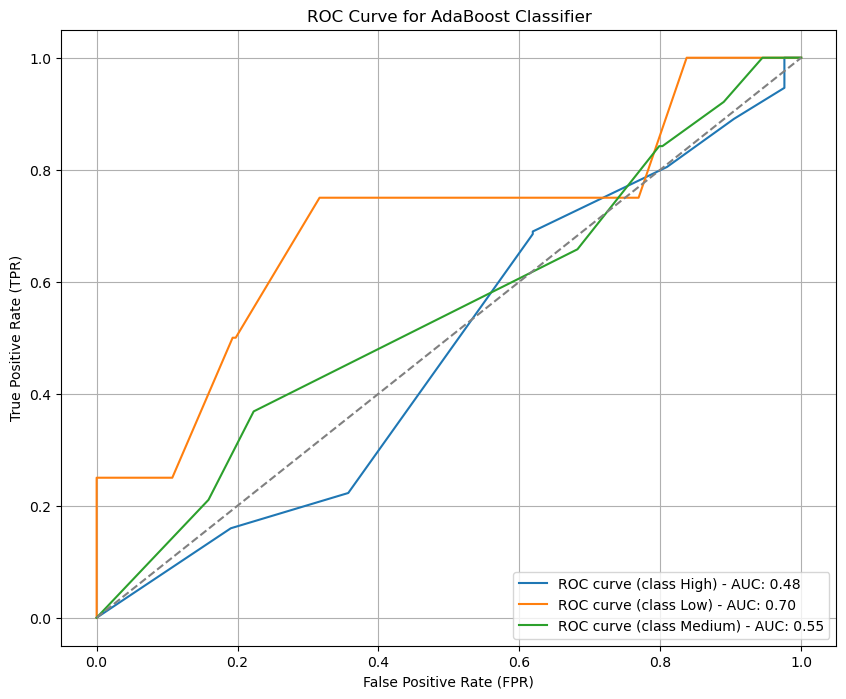

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize nhãn mục tiêu (đa lớp thành dạng nhị phân one-vs-rest)
y_test_bin = label_binarize(y_test, classes=adaboost_model.classes_)
n_classes = y_test_bin.shape[1]

# Tính xác suất dự đoán
y_score = adaboost_model.predict_proba(X_test)

# Vẽ ROC Curve cho từng lớp
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Tính FPR, TPR và ngưỡng
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    
    # Vẽ đường ROC cho lớp thứ i
    plt.plot(fpr, tpr, label=f'ROC curve (class {adaboost_model.classes_[i]}) - AUC: {auc:.2f}')

# Đường chéo tham chiếu (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Thiết lập biểu đồ
plt.title('ROC Curve for AdaBoost Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
